In [2]:
# import the necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score

In [4]:
#load the mnist dataset
mnist = fetch_openml('mnist_784',version=1,as_frame=False)

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
X = mnist['data'] / 255.0 #Normalizing pixel values to [0,1]
X.shape

(70000, 784)

In [10]:
y = mnist['target']
y.shape

(70000,)

In [12]:
#convert to integer
y = y.astype(int)
y

array([5, 0, 4, ..., 4, 5, 6])

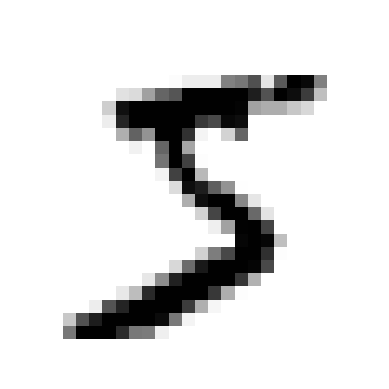

Label:5


In [14]:
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

print(f"Label:{y[0]}")

In [16]:
#splitting the dataset into training  and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train.shape

(56000, 784)

In [20]:
y_train.shape

(56000,)

In [22]:
X_test.shape

(14000, 784)

In [24]:
y_test.shape

(14000,)

In [26]:
#Implementing One-vs-All SVM
#We are required to:
#1)Train one svm for each class (0-9)
#2)Use a non-linear kernel(e.g RBF) for better performance
#3)Store all model and predict using the one with the highest confidence



In [ ]:
#Intializing SVM models for each class
svm_model = {}

#Training one SVM for each class
for digit in range(10):
    print(f"Training SVM for digit {digit}....")
    #Creating  binary labels: 1 for current digit, 0 for all others
    y_train_binary = (y_train == digit).astype(int)
    #Training and svm with RBF Kernel
    model = SVC(kernel = 'rbf',probability=True,random_state=42)
    model.fit(X_train,y_train_binary)
    #Storing the trained model
    svm_model[digit] = model


Training SVM for digit 0....
Training SVM for digit 1....
Training SVM for digit 2....
Training SVM for digit 3....


In [ ]:
#Predicting with One-vs-All
#We are required to : 1)Compute confidence scores for each model
#2) Select the class with the highest confidence for each sample


In [ ]:
#Predicting using One-vs-All
def predict_ova(models,X):
    scores = np.zeros((X.shape[0],len(models)))

    #Getting confidence scores for each class
    for digit, model in model.items():
        scores[:,digit] = model.predict_proba(X)[:,1] #Probability for the positive class
    return np.argmax(scores,axis=1)

y_pred = predict_ova(svm_models,X_test)

    

In [ ]:
#Evaluating the accuracy of the model
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy * 100:.2f}%")

In [ ]:
#Improving the performance of our model
#We'll use hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':[0.1,1,10],
    'gamma':[0.001,0.01,0.1]
}
grid = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=3)
grid = grid.fit(X_train,y_train_binary)